In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

import statsmodels.api as sm




## Data extraction

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/jeolmuni/jeolmuni/master/study-group/2018_InternationalTravelSurvey_cleaned_col.csv")


In [6]:
pd.options.display.max_columns = 1000

In [4]:
df.head()

,Unnamed: 0,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1,Q3A1,Q3A2,Q3A3,Q3A4,Q3B1,Q3B2,Q4,Q4_1A1,Q4_1A2,Q4_1A3,Q4_1A4,Q4_1A5,Q4_1A6,Q4_1A7,Q4_1A8,Q4_1A9,Q4_1A10,Q5_1,Q5_2A1,Q5_2A2,Q5_2A3,Q6_1A1,Q6_1A2,Q6_1A3,Q6_2A1,Q6_2A2,Q6_2A3,Q6_3A1,Q6_3A2,Q6_3A3,Q7,Q8A1,Q8A2,Q8A3,Q9_1A1,Q9_1A2,Q9_1A3,Q9_1A4,Q9_1A5,Q9_1A6,Q9_1A7,Q9_1A8,Q9_1A9,Q9_1A10,Q9_1A11,Q9_1A12,Q9_1A13,Q9_1A14,Q9_1A15,Q9_1A16,Q9_1A17,Q9_1A18,Q9_1A19,Q9_1A20,Q9_2A1,Q9_2A2,Q9_2A3,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,Q10_1A9,Q10_1A10,Q10_1A11,Q10_1A12,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_1B1,Q10_1B2,Q10_1B3,Q10_1B4,Q10_1B5,Q10_1B6,Q10_1B7,Q10_1B8,Q10_2_1A1,Q10_2_2A1,Q10_2_3A1,Q10_2_4A1,Q10_2_5A1,Q10_2_6A1,Q10_2_7A1,Q10_2_8A1,Q10_2_9A1,Q10_2_10A1,Q10_2_11A1,Q10_2_12A1,Q10_2_13A1,Q10_2_14A1,Q10_2_15A1,Q10_2_16A1,Q10_2_17A1,MQ10_2_1A1,MQ10_2_2A1,MQ10_2_3A1,MQ10_2_4A1,MQ10_2_5A1,MQ10_2_6A1,MQ10_2_7A1,MQ10_2_8A1,MQ10_2_9A1,MQ10_2_10A1,MQ10_2_11A1,MQ10_2_12A1,MQ10_2_13A1,MQ10_2_14A1,MQ10_2_15A1,MQ10_2_16A1,MQ10_2_17A1,Q10_2_1A2,Q10_2_2A2,Q10_2_3A2,Q10_2_4A2,Q10_2_5A2,Q10_2_6A2,Q10_2_7A2,Q10_2_8A2,Q10_2_9A2,Q10_2_10A2,Q10_2_11A2,Q10_2_12A2,Q10_2_13A2,Q10_2_14A2,Q10_2_15A2,Q10_2_16A2,Q10_2_17A2,MQ10_2_1A2,MQ10_2_2A2,MQ10_2_3A2,MQ10_2_4A2,MQ10_2_5A2,MQ10_2_6A2,MQ10_2_7A2,MQ10_2_8A2,MQ10_2_9A2,MQ10_2_10A2,MQ10_2_11A2,MQ10_2_12A2,MQ10_2_13A2,MQ10_2_14A2,MQ10_2_15A2,MQ10_2_16A2,MQ10_2_17A2,Q10_3A1,MQ10_3A1,CQ10_3A1,Q10_3A2,MQ10_3A2,CQ10_3A2,Q10_4A1,Q10_4A2,Q10_4A3,Q10_4A4,Q10_4A5,Q10_4A6,Q10_4A7,Q10_4A8,Q10_4A9,Q10_4A10,Q10_4A11,Q10_4A12,Q10_4A13,Q10_4A14,Q10_4A15,Q10_4A16,Q10_4A17,Q10_4A18,Q10_4A19,Q10_4A20,Q10_4A21,Q10_4A22,Q10_4A23,Q10_4A24,Q10_4A25,Q10_4A26,Q10_4A27,Q10_4A28,Q10_4A29,Q10_4A30,Q10_5A1,Q10_5A2,Q10_5A3,Q10_5A4,Q10_5A5,Q10_5A6,Q10_5A7,Q10_5A8,Q10_5A9,Q10_5_1,Q10_5_2,Q10_5_3,Q10_5_4,Q10_5_5,Q10_5_6,Q10_5_7,Q10_5_8,Q11A1,Q11A2,Q11A3,Q12_1A1,Q12_1A2,Q12_1A3,Q12_2A1,Q12_2A2,Q12_2A3,Q13,Q14_1T,Q14_1A,Q14_1B,Q14_1C,Q14_2_1,Q14_2_2,Q14_2_3,Q14_2_4,Q14_2_5,Q14_2_6,Q14_2_7,Q14_2_8,Q14_2_9,MQ14_1T,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1,MQ14_2_2,MQ14_2_3,MQ14_2_4,MQ14_2_5,MQ14_2_6,MQ14_2_7,MQ14_2_8,MQ14_2_9,CQ14_1T,CQ14_1A,CQ14_1B,CQ14_1C,CQ14_2_1,CQ14_2_2,CQ14_2_3,CQ14_2_4,CQ14_2_5,CQ14_2_6,CQ14_2_7,CQ14_2_8,CQ14_2_9,I_Q14_1T,I_Q14_2_1,I_Q14_2_3,I_Q14_2_4,I_Q14_2_5,I_Q14_2_6,I_Q14_2_7,I_Q14_2_8,I_Q14_2_9,I_MQ14_1T,I_MQ14_2_1,I_MQ14_2_3,I_MQ14_2_4,I_MQ14_2_5,I_MQ14_2_6,I_MQ14_2_7,I_MQ14_2_8,I_MQ14_2_9,I_CQ14_1T,I_CQ14_2_1,I_CQ14_2_3,I_CQ14_2_4,I_CQ14_2_5,I_CQ14_2_6,I_CQ14_2_7,I_CQ14_2_8,I_CQ14_2_9,G_Q14_1T,G_Q14_2_2,G_Q14_2_3,G_Q14_2_4,G_Q14_2_5,G_Q14_2_6,G_Q14_2_7,G_Q14_2_8,G_Q14_2_9,G_MQ14_1T,G_MQ14_2_2,G_MQ14_2_3,G_MQ14_2_4,G_MQ14_2_5,G_MQ14_2_6,G_MQ14_2_7,G_MQ14_2_8,G_MQ14_2_9,G_CQ14_1T,G_CQ14_2_2,G_CQ14_2_3,G_CQ14_2_4,G_CQ14_2_5,G_CQ14_2_6,G_CQ14_2_7,G_CQ14_2_8,G_CQ14_2_9,A_Q14_1T,A_Q14_2_2,A_Q14_2_3,A_Q14_2_4,A_Q14_2_5,A_Q14_2_6,A_Q14_2_7,A_Q14_2_8,A_Q14_2_9,A_MQ14_1T,A_MQ14_2_2,A_MQ14_2_3,A_MQ14_2_4,A_MQ14_2_5,A_MQ14_2_6,A_MQ14_2_7,A_MQ14_2_8,A_MQ14_2_9,A_CQ14_1T,A_CQ14_2_2,A_CQ14_2_3,A_CQ14_2_4,A_CQ14_2_5,A_CQ14_2_6,A_CQ14_2_7,A_CQ14_2_8,A_CQ14_2_9,GA_Q14_2_1T,GA_Q14_2_2,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_6,GA_Q14_2_7,GA_Q14_2_8,GA_Q14_2_9,GA_MQ14_1T,GA_MQ14_2_2,GA_MQ14_2_3,GA_MQ14_2_4,GA_MQ14_2_5,GA_MQ14_2_6,GA_MQ14_2_7,GA_MQ14_2_8,GA_MQ14_2_9,GA_CQ14_1T,GA_CQ14_2_2,GA_CQ14_2_3,GA_CQ14_2_4,GA_CQ14_2_5,GA_CQ14_2_6,GA_CQ14_2_7,GA_CQ14_2_8,GA_CQ14_2_9,DAY_MQ14_1T,Q15_1,Q15_2A1,Q15_2A2,Q15_2A3,Q15_2A4,Q15_2A5,Q15_2A6,Q15_2A7,Q15_2A8,Q15_2A9,Q15_2A10,Q15_2A11,Q15_2A12,Q16,Q17,Q18A1,Q18A2,Q19,Q20_1,Q20_2A1,Q20_2A2,Q20_2A3,ID,D_MON,D_QUA,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY
0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,2.0,6.0,5,1.0,NaN,1.0,5.0,2.0,5,1.0,NaN,1,1,NaN,NaN,1,2.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,

In [7]:
df = df.rename(columns={"Q1": "Q1_NofVisit", "Q2A1": "Q2_TravelParty"})
df = df.rename(columns={"Q2_1": "Q2_1_NofParty", "Q3A1": "Q3A1_onlyKorea", "Q3A2": "Q3A2_BeforeKorea",
                      "Q3A3": "Q3A3_AfterKorea", "Q3A4": "Q3A4_BeforeAfterKorea", "Q4": "Q4_ConsiderOther"})
df = df.rename(columns={"Q5_1": "Q5_1_purpose", "Q5_2A1": "Q5_2A1_purpose_1", "Q5_2A2": "Q5_2A2_purpose_2", "Q5_2A3": "Q5_2A3_purpose_3"})
df = df.rename(columns={"Q6_1A1": "Q6_1A1_PreInfoSearch1", "Q6_1A2": "Q6_1A2_PreInfoSearch2", "Q6_1A3": "Q6_1A3_PreInfoSearch3"})
df = df.rename(columns={"Q6_2A1": "Q6_2A1_IntInfo1", "Q6_2A2": "Q6_2A2_IntInfo2", "Q6_2A3": "Q6_2A3_IntInfo3"})
df = df.rename(columns={"Q6_3A1": "Q6_3A1_InfoContent1", "Q6_3A2": "Q6_3A2_InfoContent2", "Q6_3A3": "Q6_3A3_InfoContent3"})
df = df.rename(columns={"Q7": "Q7_horizon", "Q8A1": "Q8A1_DuringInfoSearch1","Q8A2": "Q8A2_DuringInfoSearch2","Q8A3": "Q8A3_DuringInfoSearch3"})
df = df.rename(columns={"Q9_2A1": "Q9_2A1_MainActivity1", "Q9_2A2": "Q9_2A2_MainActivity2","Q9_2A3": "Q9_2A3_MainActivity3"})
df = df.rename(columns={"Q10_3A1": "Q10_3A1_LON_original", "MQ10_3A1": "MQ10_3A1_LON_less60", "Q10_3A2": "Q10_3A2_LOS_original","MQ10_3A2": "MQ10_3A2_LOS_less61"})
df = df.rename(columns={"Q10_5A1": "Q10_5A1_Accomo1", "Q10_5A2": "Q10_5A2_Accomo2", "Q10_5A3": "Q10_5A3_Accomo3","Q10_5A4": "Q10_5A4_Accomo4",
                      "Q10_5A5": "Q10_5A5_Accomo5","Q10_5A6": "Q10_5A6_Accomo6","Q10_5A7": "Q10_5A7_Accomo7","Q10_5A8": "Q10_5A8_Accomo8","Q10_5A9": "Q10_5A9_Accomo9"})
df = df.rename(columns={"Q10_5_1": "Q10_5_1_LOS_Hotel", "Q10_5_2": "Q10_5_2_LOS_Motel", "Q10_5_3": "Q10_5_3_LOS_Hostel","Q10_5_4": "Q10_5_4_LOS_Condo",
                       "Q10_5_5": "Q10_5_5_LOS_friends","Q10_5_6": "Q10_5_6_LOS_Dorm","Q10_5_7": "Q10_5_7_LOS_Airbnb","Q10_5_8": "Q10_5_8_LOS_Other"})

df = df.rename(columns={"Q12_1A1": "Q12_1A1_shoppingItems1", "Q12_1A2": "Q12_1A2_shoppingItems2", "Q12_1A3": "Q12_1A3_shoppingItems3",
                       "Q12_2A1": "Q12_2A1_ShopPlacec1","Q12_2A2": "Q12_2A2_ShopPlacec2","Q12_2A3": "Q12_2A3_ShopPlacec3"})

df = df.rename(columns={"Q13": "Q13_VisitTypes", "Q14_1T": "Q14_1T_TotalExpense", "Q14_2_1": "Q14_2_1_Expense_Accom",
                        "Q14_2_2": "Q14_2_2_Expense_Owncountry","Q14_2_3": "Q14_2_3_Expense_shop","Q14_2_4": "Q14_2_4_Expense_food",
                        "Q14_2_5": "Q14_2_5_Expense_transportation","Q14_2_6": "Q14_2_6_Expense_KoreaAgency","Q14_2_7": "Q14_2_7_Expense_culture",
                        "Q14_2_8": "Q14_2_8_Expense_Data", "Q14_2_9": "Q14_2_9_Expense_Other"})

df = df.rename(columns={"MQ14_1T": "MQ14_1T_TotalExpense", "MQ14_2_1": "MQ14_2_1_Expense_Accom",
                        "MQ14_2_2": "MQ14_2_2_Expense_Owncountry","MQ14_2_3": "MQ14_2_3_Expense_shop","MQ14_2_4": "MQ14_2_4_Expense_food",
                        "MQ14_2_5": "MQ14_2_5_Expense_transportation","MQ14_2_6": "MQ14_2_6_Expense_KoreaAgency","MQ14_2_7": "MQ14_2_7_Expense_culture",
                        "MQ14_2_8": "MQ14_2_8_Expense_Data", "MQ14_2_9": "MQ14_2_9_Expense_Other"})

df = df.rename(columns={"Q15_1": "Q15_1_OverallSat", "Q15_2A1": "Q15_2A1_Sat_Boarder",
                        "Q15_2A2": "Q15_2A2_Sat_transportation","Q15_2A3": "Q15_2A3_Sat_wayTofind","Q15_2A4": "Q15_2A4_Sat_Accom",
                        "Q15_2A5": "Q15_2A5_Sat_Food","Q15_2A6": "Q15_2A6_Sat_Shop","Q15_2A7": "Q15_2A7_Sat_InfoCenter",
                        "Q15_2A8": "Q15_2A8_Sat_Attractive", "Q15_2A9": "Q15_2A9_Sat_Language","Q15_2A10": "Q15_2A10_Sat_Expense",
                      "Q15_2A11": "Q15_2A11_Sat_Security","Q15_2A12": "Q15_2A12_Sat_Mobile",  "Q16": "Q16_Revisit", 
                       "Q17": "Q17_recommend","Q18A1": "Q18A1_BeforeImage","Q18A2": "Q18A2_AfterImage"})


df.head()

,Unnamed: 0,Q1_NofVisit,Q2_TravelParty,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1_NofParty,Q3A1_onlyKorea,Q3A2_BeforeKorea,Q3A3_AfterKorea,Q3A4_BeforeAfterKorea,Q3B1,Q3B2,Q4_ConsiderOther,Q4_1A1,Q4_1A2,Q4_1A3,Q4_1A4,Q4_1A5,Q4_1A6,Q4_1A7,Q4_1A8,Q4_1A9,Q4_1A10,Q5_1_purpose,Q5_2A1_purpose_1,Q5_2A2_purpose_2,Q5_2A3_purpose_3,Q6_1A1_PreInfoSearch1,Q6_1A2_PreInfoSearch2,Q6_1A3_PreInfoSearch3,Q6_2A1_IntInfo1,Q6_2A2_IntInfo2,Q6_2A3_IntInfo3,Q6_3A1_InfoContent1,Q6_3A2_InfoContent2,Q6_3A3_InfoContent3,Q7_horizon,Q8A1_DuringInfoSearch1,Q8A2_DuringInfoSearch2,Q8A3_DuringInfoSearch3,Q9_1A1,Q9_1A2,Q9_1A3,Q9_1A4,Q9_1A5,Q9_1A6,Q9_1A7,Q9_1A8,Q9_1A9,Q9_1A10,Q9_1A11,Q9_1A12,Q9_1A13,Q9_1A14,Q9_1A15,Q9_1A16,Q9_1A17,Q9_1A18,Q9_1A19,Q9_1A20,Q9_2A1_MainActivity1,Q9_2A2_MainActivity2,Q9_2A3_MainActivity3,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,Q10_1A9,Q10_1A10,Q10_1A11,Q10_1A12,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_1B1,Q10_1B2,Q10_1B3,Q10_1B4,Q10_1B5,Q10_1B6,Q10_1B7,Q10_1B8,Q10_2_1A1,Q10_2_2A1,Q10_2_3A1,Q10_2_4A1,Q10_2_5A1,Q10_2_6A1,Q10_2_7A1,Q10_2_8A1,Q10_2_9A1,Q10_2_10A1,Q10_2_11A1,Q10_2_12A1,Q10_2_13A1,Q10_2_14A1,Q10_2_15A1,Q10_2_16A1,Q10_2_17A1,MQ10_2_1A1,MQ10_2_2A1,MQ10_2_3A1,MQ10_2_4A1,MQ10_2_5A1,MQ10_2_6A1,MQ10_2_7A1,MQ10_2_8A1,MQ10_2_9A1,MQ10_2_10A1,MQ10_2_11A1,MQ10_2_12A1,MQ10_2_13A1,MQ10_2_14A1,MQ10_2_15A1,MQ10_2_16A1,MQ10_2_17A1,Q10_2_1A2,Q10_2_2A2,Q10_2_3A2,Q10_2_4A2,Q10_2_5A2,Q10_2_6A2,Q10_2_7A2,Q10_2_8A2,Q10_2_9A2,Q10_2_10A2,Q10_2_11A2,Q10_2_12A2,Q10_2_13A2,Q10_2_14A2,Q10_2_15A2,Q10_2_16A2,Q10_2_17A2,MQ10_2_1A2,MQ10_2_2A2,MQ10_2_3A2,MQ10_2_4A2,MQ10_2_5A2,MQ10_2_6A2,MQ10_2_7A2,MQ10_2_8A2,MQ10_2_9A2,MQ10_2_10A2,MQ10_2_11A2,MQ10_2_12A2,MQ10_2_13A2,MQ10_2_14A2,MQ10_2_15A2,MQ10_2_16A2,MQ10_2_17A2,Q10_3A1_LON_original,MQ10_3A1_LON_less60,CQ10_3A1,Q10_3A2_LOS_original,MQ10_3A2_LOS_less61,CQ10_3A2,Q10_4A1,Q10_4A2,Q10_4A3,Q10_4A4,Q10_4A5,Q10_4A6,Q10_4A7,Q10_4A8,Q10_4A9,Q10_4A10,Q10_4A11,Q10_4A12,Q10_4A13,Q10_4A14,Q10_4A15,Q10_4A16,Q10_4A17,Q10_4A18,Q10_4A19,Q10_4A20,Q10_4A21,Q10_4A22,Q10_4A23,Q10_4A24,Q10_4A25,Q10_4A26,Q10_4A27,Q10_4A28,Q10_4A29,Q10_4A30,Q10_5A1_Accomo1,Q10_5A2_Accomo2,Q10_5A3_Accomo3,Q10_5A4_Accomo4,Q10_5A5_Accomo5,Q10_5A6_Accomo6,Q10_5A7_Accomo7,Q10_5A8_Accomo8,Q10_5A9_Accomo9,Q10_5_1_LOS_Hotel,Q10_5_2_LOS_Motel,Q10_5_3_LOS_Hostel,Q10_5_4_LOS_Condo,Q10_5_5_LOS_friends,Q10_5_6_LOS_Dorm,Q10_5_7_LOS_Airbnb,Q10_5_8_LOS_Other,Q11A1,Q11A2,Q11A3,Q12_1A1_shoppingItems1,Q12_1A2_shoppingItems2,Q12_1A3_shoppingItems3,Q12_2A1_ShopPlacec1,Q12_2A2_ShopPlacec2,Q12_2A3_ShopPlacec3,Q13_VisitTypes,Q14_1T_TotalExpense,Q14_1A,Q14_1B,Q14_1C,Q14_2_1_Expense_Accom,Q14_2_2_Expense_Owncountry,Q14_2_3_Expense_shop,Q14_2_4_Expense_food,Q14_2_5_Expense_transportation,Q14_2_6_Expense_KoreaAgency,Q14_2_7_Expense_culture,Q14_2_8_Expense_Data,Q14_2_9_Expense_Other,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,CQ14_1T,CQ14_1A,CQ14_1B,CQ14_1C,CQ14_2_1,CQ14_2_2,CQ14_2_3,CQ14_2_4,CQ14_2_5,CQ14_2_6,CQ14_2_7,CQ14_2_8,CQ14_2_9,I_Q14_1T,I_Q14_2_1,I_Q14_2_3,I_Q14_2_4,I_Q14_2_5,I_Q14_2_6,I_Q14_2_7,I_Q14_2_8,I_Q14_2_9,I_MQ14_1T,I_MQ14_2_1,I_MQ14_2_3,I_MQ14_2_4,I_MQ14_2_5,I_MQ14_2_6,I_MQ14_2_7,I_MQ14_2_8,I_MQ14_2_9,I_CQ14_1T,I_CQ14_2_1,I_CQ14_2_3,I_CQ14_2_4,I_CQ14_2_5,I_CQ14_2_6,I_CQ14_2_7,I_CQ14_2_8,I_CQ14_2_9,G_Q14_1T,G_Q14_2_2,G_Q14_2_3,G_Q14_2_4,G_Q14_2_5,G_Q14_2_6,G_Q14_2_7,G_Q14_2_8,G_Q14_2_9,G_MQ14_1T,G_MQ14_2_2,G_MQ14_2_3,G_MQ14_2_4,G_MQ14_2_5,G_MQ14_2_6,G_MQ14_2_7,G_MQ14_2_8,G_MQ14_2_9,G_CQ14_1T,G_CQ14_2_2,G_CQ14_2_3,G_CQ14_2_4,G_CQ14_2_5,G_CQ14_2_6,G_CQ14_2_7,G_CQ14_2_8,G_CQ14_2_9,A_Q14_1T,A_Q14_2_2,A_Q14_2_3,A_Q14_2_4,A_Q14_2_5,A_Q14_2_6,A_Q14_2_7,A_Q14_2_8,A_Q14_2_9,A_MQ14_1T,A_MQ14_2_2,A_MQ14_2_3,A_MQ14_2_4,A_MQ14_2_5,A_MQ14_2_6,A_MQ14_2_7,A_MQ14_2_8,A_MQ14_2_9,A_CQ14_1T,A_CQ14_2_2,A_CQ14_2_3,A_CQ14_2_4,A_CQ14_2_5,A_CQ14

In [8]:
df.loc[(df['D_AGE'] == 1), 'AGE_10'] = 1  
df.loc[(df['D_AGE'] == 2), 'AGE_20'] = 1  
df.loc[(df['D_AGE'] == 3), 'AGE_30'] = 1  
df.loc[(df['D_AGE'] == 4), 'AGE_40'] = 1  
df.loc[(df['D_AGE'] == 5), 'AGE_50'] = 1  
df.loc[(df['D_AGE'] == 6), 'AGE_60'] = 1  

df["AGE_10"] = df["AGE_10"].fillna(0)
df["AGE_20"] = df["AGE_20"].fillna(0)
df["AGE_30"] = df["AGE_30"].fillna(0)
df["AGE_40"] = df["AGE_40"].fillna(0)
df["AGE_50"] = df["AGE_50"].fillna(0)
df["AGE_60"] = df["AGE_60"].fillna(0)



In [20]:
df.head()

,Unnamed: 0,Q1_NofVisit,Q2_TravelParty,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1_NofParty,Q3A1_onlyKorea,Q3A2_BeforeKorea,Q3A3_AfterKorea,Q3A4_BeforeAfterKorea,Q3B1,Q3B2,Q4_ConsiderOther,Q4_1A1,Q4_1A2,Q4_1A3,Q4_1A4,Q4_1A5,Q4_1A6,Q4_1A7,Q4_1A8,Q4_1A9,Q4_1A10,Q5_1_purpose,Q5_2A1_purpose_1,Q5_2A2_purpose_2,Q5_2A3_purpose_3,Q6_1A1_PreInfoSearch1,Q6_1A2_PreInfoSearch2,Q6_1A3_PreInfoSearch3,Q6_2A1_IntInfo1,Q6_2A2_IntInfo2,Q6_2A3_IntInfo3,Q6_3A1_InfoContent1,Q6_3A2_InfoContent2,Q6_3A3_InfoContent3,Q7_horizon,Q8A1_DuringInfoSearch1,Q8A2_DuringInfoSearch2,Q8A3_DuringInfoSearch3,Q9_1A1,Q9_1A2,Q9_1A3,Q9_1A4,Q9_1A5,Q9_1A6,Q9_1A7,Q9_1A8,Q9_1A9,Q9_1A10,Q9_1A11,Q9_1A12,Q9_1A13,Q9_1A14,Q9_1A15,Q9_1A16,Q9_1A17,Q9_1A18,Q9_1A19,Q9_1A20,Q9_2A1_MainActivity1,Q9_2A2_MainActivity2,Q9_2A3_MainActivity3,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,Q10_1A9,Q10_1A10,Q10_1A11,Q10_1A12,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_1B1,Q10_1B2,Q10_1B3,Q10_1B4,Q10_1B5,Q10_1B6,Q10_1B7,Q10_1B8,Q10_2_1A1,Q10_2_2A1,Q10_2_3A1,Q10_2_4A1,Q10_2_5A1,Q10_2_6A1,Q10_2_7A1,Q10_2_8A1,Q10_2_9A1,Q10_2_10A1,Q10_2_11A1,Q10_2_12A1,Q10_2_13A1,Q10_2_14A1,Q10_2_15A1,Q10_2_16A1,Q10_2_17A1,MQ10_2_1A1,MQ10_2_2A1,MQ10_2_3A1,MQ10_2_4A1,MQ10_2_5A1,MQ10_2_6A1,MQ10_2_7A1,MQ10_2_8A1,MQ10_2_9A1,MQ10_2_10A1,MQ10_2_11A1,MQ10_2_12A1,MQ10_2_13A1,MQ10_2_14A1,MQ10_2_15A1,MQ10_2_16A1,MQ10_2_17A1,Q10_2_1A2,Q10_2_2A2,Q10_2_3A2,Q10_2_4A2,Q10_2_5A2,Q10_2_6A2,Q10_2_7A2,Q10_2_8A2,Q10_2_9A2,Q10_2_10A2,Q10_2_11A2,Q10_2_12A2,Q10_2_13A2,Q10_2_14A2,Q10_2_15A2,Q10_2_16A2,Q10_2_17A2,MQ10_2_1A2,MQ10_2_2A2,MQ10_2_3A2,MQ10_2_4A2,MQ10_2_5A2,MQ10_2_6A2,MQ10_2_7A2,MQ10_2_8A2,MQ10_2_9A2,MQ10_2_10A2,MQ10_2_11A2,MQ10_2_12A2,MQ10_2_13A2,MQ10_2_14A2,MQ10_2_15A2,MQ10_2_16A2,MQ10_2_17A2,Q10_3A1_LON_original,MQ10_3A1_LON_less60,CQ10_3A1,Q10_3A2_LOS_original,MQ10_3A2_LOS_less61,CQ10_3A2,Q10_4A1,Q10_4A2,Q10_4A3,Q10_4A4,Q10_4A5,Q10_4A6,Q10_4A7,Q10_4A8,Q10_4A9,Q10_4A10,Q10_4A11,Q10_4A12,Q10_4A13,Q10_4A14,Q10_4A15,Q10_4A16,Q10_4A17,Q10_4A18,Q10_4A19,Q10_4A20,Q10_4A21,Q10_4A22,Q10_4A23,Q10_4A24,Q10_4A25,Q10_4A26,Q10_4A27,Q10_4A28,Q10_4A29,Q10_4A30,Q10_5A1_Accomo1,Q10_5A2_Accomo2,Q10_5A3_Accomo3,Q10_5A4_Accomo4,Q10_5A5_Accomo5,Q10_5A6_Accomo6,Q10_5A7_Accomo7,Q10_5A8_Accomo8,Q10_5A9_Accomo9,Q10_5_1_LOS_Hotel,Q10_5_2_LOS_Motel,Q10_5_3_LOS_Hostel,Q10_5_4_LOS_Condo,Q10_5_5_LOS_friends,Q10_5_6_LOS_Dorm,Q10_5_7_LOS_Airbnb,Q10_5_8_LOS_Other,Q11A1,Q11A2,Q11A3,Q12_1A1_shoppingItems1,Q12_1A2_shoppingItems2,Q12_1A3_shoppingItems3,Q12_2A1_ShopPlacec1,Q12_2A2_ShopPlacec2,Q12_2A3_ShopPlacec3,Q13_VisitTypes,Q14_1T_TotalExpense,Q14_1A,Q14_1B,Q14_1C,Q14_2_1_Expense_Accom,Q14_2_2_Expense_Owncountry,Q14_2_3_Expense_shop,Q14_2_4_Expense_food,Q14_2_5_Expense_transportation,Q14_2_6_Expense_KoreaAgency,Q14_2_7_Expense_culture,Q14_2_8_Expense_Data,Q14_2_9_Expense_Other,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,CQ14_1T,CQ14_1A,CQ14_1B,CQ14_1C,CQ14_2_1,CQ14_2_2,CQ14_2_3,CQ14_2_4,CQ14_2_5,CQ14_2_6,CQ14_2_7,CQ14_2_8,CQ14_2_9,I_Q14_1T,I_Q14_2_1,I_Q14_2_3,I_Q14_2_4,I_Q14_2_5,I_Q14_2_6,I_Q14_2_7,I_Q14_2_8,I_Q14_2_9,I_MQ14_1T,I_MQ14_2_1,I_MQ14_2_3,I_MQ14_2_4,I_MQ14_2_5,I_MQ14_2_6,I_MQ14_2_7,I_MQ14_2_8,I_MQ14_2_9,I_CQ14_1T,I_CQ14_2_1,I_CQ14_2_3,I_CQ14_2_4,I_CQ14_2_5,I_CQ14_2_6,I_CQ14_2_7,I_CQ14_2_8,I_CQ14_2_9,G_Q14_1T,G_Q14_2_2,G_Q14_2_3,G_Q14_2_4,G_Q14_2_5,G_Q14_2_6,G_Q14_2_7,G_Q14_2_8,G_Q14_2_9,G_MQ14_1T,G_MQ14_2_2,G_MQ14_2_3,G_MQ14_2_4,G_MQ14_2_5,G_MQ14_2_6,G_MQ14_2_7,G_MQ14_2_8,G_MQ14_2_9,G_CQ14_1T,G_CQ14_2_2,G_CQ14_2_3,G_CQ14_2_4,G_CQ14_2_5,G_CQ14_2_6,G_CQ14_2_7,G_CQ14_2_8,G_CQ14_2_9,A_Q14_1T,A_Q14_2_2,A_Q14_2_3,A_Q14_2_4,A_Q14_2_5,A_Q14_2_6,A_Q14_2_7,A_Q14_2_8,A_Q14_2_9,A_MQ14_1T,A_MQ14_2_2,A_MQ14_2_3,A_MQ14_2_4,A_MQ14_2_5,A_MQ14_2_6,A_MQ14_2_7,A_MQ14_2_8,A_MQ14_2_9,A_CQ14_1T,A_CQ14_2_2,A_CQ14_2_3,A_CQ14_2_4,A_CQ14_2_5,A_CQ14

In [20]:
df_filt = df[list(df.loc[:, "Q1_NofVisit": "Q2_TravelParty"]) + list(df.loc[:, "MQ14_1T_TotalExpense":"MQ14_2_9_Expense_Other"]) + list(df.loc[:, "Q15_1_OverallSat":"AGE_60"])]
                                                                  

In [11]:
df_filt["Q2_TravelParty"] = df_filt["Q2_TravelParty"].fillna(1)

/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_filt["Q15_2A2_Sat_transportation"] = df_filt["Q15_2A2_Sat_transportation"].replace(0, np.nan)
df_filt["Q15_2A3_Sat_wayTofind"] = df_filt["Q15_2A3_Sat_wayTofind"].replace(0, np.nan)
df_filt["Q15_2A4_Sat_Accom"] = df_filt["Q15_2A4_Sat_Accom"].replace(0, np.nan)
df_filt["Q15_2A6_Sat_Shop"] = df_filt["Q15_2A6_Sat_Shop"].replace(0, np.nan)
df_filt["Q15_2A7_Sat_InfoCenter"] = df_filt["Q15_2A7_Sat_InfoCenter"].replace(0, np.nan)
df_filt["Q15_2A8_Sat_Attractive"] = df_filt["Q15_2A8_Sat_Attractive"].replace(0, np.nan)
df_filt["Q15_2A10_Sat_Expense"] = df_filt["Q15_2A10_Sat_Expense"].replace(0, np.nan)
df_filt["Q15_2A12_Sat_Mobile"] = df_filt["Q15_2A12_Sat_Mobile"].replace(0, np.nan)




/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [13]:
X = df_filt[list(df_filt.loc[:, "Q1_NofVisit": "Q2_TravelParty"]) + list(df_filt.loc[:, "Q15_1_OverallSat": "Q18A2_AfterImage"])]
X.corr()


,Q1_NofVisit,Q2_TravelParty,Q15_1_OverallSat,Q15_2A1_Sat_Boarder,Q15_2A2_Sat_transportation,Q15_2A3_Sat_wayTofind,Q15_2A4_Sat_Accom,Q15_2A5_Sat_Food,Q15_2A6_Sat_Shop,Q15_2A7_Sat_InfoCenter,Q15_2A8_Sat_Attractive,Q15_2A9_Sat_Language,Q15_2A10_Sat_Expense,Q15_2A11_Sat_Security,Q15_2A12_Sat_Mobile,Q16_Revisit,Q17_recommend,Q18A1_BeforeImage,Q18A2_AfterImage
Q1_NofVisit,1.000000,-0.095374,-0.022692,-0.035154,-0.027924,-0.017582,-0.015604,0.011114,-0.027239,-0.036084,-0.057464,0.014404,-0.016278,-0.033440,-0.029300,0.093249,0.021847,0.055594,-0.015261
Q2_TravelParty,-0.095374,1.000000,-0.031277,-0.057228,-0.069169,-0.040302,-0.020960,-0.008484,-0.018995,-0.026007,-0.033471,-0.008964,-0.004209,-0.058992,-0.036766,-0.057328,-0.042182,-0.034381,-0.046262
Q15_1_OverallSat,-0.022692,-0.031277,1.000000,0.392765,0.394807,0.345785,0.379350,0.382618,0.367491,0.344923,0.412257,0.270635,0.301441,0.382799,0.308565,0.426002,0.505700,0.357920,0.538869
Q15_2A1_Sat_Boarder,-0.035154,-0.057228,0.392765,1.000000,0.492081,0.388417,0.407625,0.306820,0.345616,0.386567,0.395830,0.256609,0.306560,0.443165,0.364537,0.283951,0.344114,0.296423,0.387341
Q15_2A2_Sat_transportation,-0.027924,-0.069169,0.394807,0.492081,1.000000,0.544716,0.405314,0.324126,0.378841,0.421122,0.434400,0.301201,0.321069,0.444098,0.382805,0.280317,0.363540,0.291197,0.411422
Q15_2A3_Sat_wayTofind,-0.017582,-0.040302,0.345785,0.388417,0.544716,1.000000,0.453501,0.325829,0.377413,0.478860,0.405825,0.429366,0.378746,0.379265,0.357759,0.252794,0.304807,0.274867,0.358140
Q15_2A4_Sat_Accom,-0.015604,-0.020960,0.379350,0.407625,0.405314,0.453501,1.000000,0.439033,0.403246,0.395732,0.408071,0.304006,0.343676,0.415049,0.368141,0.281355,0.347720,0.278764,0.375516
Q15_2A5_Sat_Food,0.011114,-0.008484,0.382618,0.306820,0.324126,0.325829,0.439033,1.000000,0.466573,0.343487,0.389547,0.341067,0.374550,0.333106,0.313062,0.305855,0.372845,0.281464,0.392399
Q15_2A6_Sat_Shop,-0.027239,-0.018995,0.367491,0.345616,0.378841,0.377413,0.403246,0.466573,1.000000,0.498144,0.458615,0.314030,0.407696,0.398821,0.356472,0.290116,0.360693,0.303527,0.397012
Q15_2A7_Sat_InfoCenter,-0.036084,-0.026007,0.344923,0.386567,0.421122,0.478860,0.395732,0.343487,0.498144,1.000000,0.579946,0.408903,0.417290,0.411598,0.368007,0.259956,0.325465,0.293934,0.372244


In [14]:
df_filt.loc[df_filt['Q1_NofVisit'] == 1, 'C_NofVisit'] = 0
df_filt.loc[df_filt['Q2_TravelParty'] == 1, 'C_TravelParty'] = 0


/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
df_filt['C_NofVisit'] = df_filt['C_NofVisit'].fillna(1)
df_filt['C_TravelParty'] = df_filt['C_TravelParty'].fillna(1)

/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
df_filt.head()

,Q1_NofVisit,Q2_TravelParty,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,Q15_1_OverallSat,Q15_2A1_Sat_Boarder,Q15_2A2_Sat_transportation,Q15_2A3_Sat_wayTofind,Q15_2A4_Sat_Accom,Q15_2A5_Sat_Food,Q15_2A6_Sat_Shop,Q15_2A7_Sat_InfoCenter,Q15_2A8_Sat_Attractive,Q15_2A9_Sat_Language,Q15_2A10_Sat_Expense,Q15_2A11_Sat_Security,Q15_2A12_Sat_Mobile,Q16_Revisit,Q17_recommend,Q18A1_BeforeImage,Q18A2_AfterImage,Q19,Q20_1,Q20_2A1,Q20_2A2,Q20_2A3,ID,D_MON,D_QUA,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY,AGE_10,AGE_20,AGE_30,AGE_40,AGE_50,AGE_60,ImageChange,Sat_Boarder_NofVisit,Sat_Trans_NofVisit,Sat_Tofind_NofVisit,Sat_Accom_NofVisit,Sat_Food_NofVisit,Sat_Shop_NofVisit,Sat_InfoCent_NofVisit,Sat_Attract_NofVisit,Sat_Lang_NofVisit,Sat_Expense_NofVisit,Sat_Security_NofVisit,Sat_Mobile_NofVisit,Sat_Boarder_Party,Sat_Trans_Party,Sat_Tofind_Party,Sat_Accom_Party,Sat_Food_Party,Sat_Shop_Party,Sat_InfoCent_Party,Sat_Attract_Party,Sat_Lang_Party,Sat_Expense_Party,Sat_Security_Party,Sat_Mobile_Party,C_NofVisit,C_TravelParty
0,1,1.0,3076.3200,3076.32,0.0000,0.0,1206.40,NaN,1206.4000,603.2000,60.3200,0.0,0.0,0.0000,0.0,4,4,4,3,4,4,4,3,4,2,4,5,4,2,4,4,5,NaN,NaN,NaN,NaN,NaN,1,1,1,13,1,3,1,1,1,1,0.258338,12,1513,0.0,0.0,1.0,0.0,0.0,0.0,1,4,4,3,4,4,4,3,4,2,4,5,4,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,5.0,4.0,0.0,0.0
1,1,2.0,697.8400,0.00,63.4400,634.4,142.74,NaN,317.2000,190.3200,31.7200,0.0,0.0,15.8600,0.0,5,4,3,5,5,5,5,5,3,5,5,5,3,4,4,4,4,31720.0,NaN,NaN,NaN,NaN,1,2,1,2,1,5,1,1,1,1,1.497972,2,204,0.0,0.0,0.0,0.0,1.0,0.0,0,4,3,5,5,5,5,5,3,5,5,5,3,8.0,6.0,10.0,10.0,10.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,0.0,1.0
2,6,1.0,1152.9000,807.03,345.8700,0.0,78.75,NaN,945.0000,78.7500,31.5000,0.0,0.0,18.9000,0.0,4,3,3,3,5,4,4,4,4,2,3,4,4,4,4,4,4,15750.0,1.0,1.0,NaN,NaN,1,3,1,2,2,2,1,1,4,2,1.806581,2,211,0.0,1.0,0.0,0.0,0.0,0.0,0,18,18,18,30,24,24,24,24,12,18,24,24,3.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,1.0,0.0
3,2,1.0,465.5625,0.00,465.5625,0.0,0.00,NaN,93.1125,279.3375,93.1125,0.0,0.0,0.0000,0.0,5,5,5,3,3,4,5,4,4,3,4,5,4,5,5,5,5,7975.0,1.0,2.0,NaN,NaN,1,4,2,2,2,2,1,1,2,2,1.609837,2,253,0.0,1.0,0.0,0.0,0.0,0.0,0,10,10,6,6,8,10,8,8,6,8,10,8,5.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,1.0,0.0
4,3,3.0,1112.8975,943.80,169.0975,0.0,157.30,NaN,629.2000,235.9500,78.6500,0.0,0.0,11.7975,0.0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,235950.0,1.0,1.0,NaN,NaN,1,5,2,2,2,3,1,1,3,2,1.872946,2,201,0.0,0.0,1.0,0.0,0.0,0.0,0,15,15,15,15,15,15,15,15,15,15,15,15,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,1.0,1.0


## Regression method

In [29]:
# Model to estimate effects of attribute sat. on overall sat.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile"]]

Y = df_filt["Q15_1_OverallSat"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q15_1_OverallSat   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     378.7
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:14:02   Log-Likelihood:                -12915.
No. Observations:               16469   AIC:                         2.587e+04
Df Residuals:                   16450   BIC:                         2.601e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [31]:
# Model to estimate effects of attribute sat. on revisit int.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile"]]


Y = df_filt["Q16_Revisit"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Q16_Revisit   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     185.3
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:14:37   Log-Likelihood:                -18069.
No. Observations:               16469   AIC:                         3.618e+04
Df Residuals:                   16450   BIC:                         3.632e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [32]:
# Model to estimate effects of attribute sat. on Recomm.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile"]]

Y = df_filt["Q17_recommend"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Q17_recommend   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     339.1
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:15:41   Log-Likelihood:                -14761.
No. Observations:               16469   AIC:                         2.956e+04
Df Residuals:                   16450   BIC:                         2.971e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [33]:
df_filt["ImageChange"] = df_filt["Q18A2_AfterImage"] - df_filt["Q18A1_BeforeImage"]

/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
# Model to estimate effects of attribute sat. on Image Change.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile"]]
    
Y = df_filt["ImageChange"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            ImageChange   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     23.96
Date:                Mon, 18 May 2020   Prob (F-statistic):           3.45e-79
Time:                        13:16:05   Log-Likelihood:                -14442.
No. Observations:               16469   AIC:                         2.892e+04
Df Residuals:                   16450   BIC:                         2.907e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [35]:
df_filt['Sat_Boarder_NofVisit'] = df_filt['Q15_2A1_Sat_Boarder'] * df_filt['Q1_NofVisit']
df_filt['Sat_Trans_NofVisit'] = df_filt['Q15_2A2_Sat_transportation'] * df_filt['Q1_NofVisit']
df_filt['Sat_Tofind_NofVisit'] = df_filt['Q15_2A3_Sat_wayTofind'] * df_filt['Q1_NofVisit']
df_filt['Sat_Accom_NofVisit'] = df_filt['Q15_2A4_Sat_Accom'] * df_filt['Q1_NofVisit']
df_filt['Sat_Food_NofVisit'] = df_filt['Q15_2A5_Sat_Food'] * df_filt['Q1_NofVisit']
df_filt['Sat_Shop_NofVisit'] = df_filt['Q15_2A6_Sat_Shop'] * df_filt['Q1_NofVisit']
df_filt['Sat_InfoCent_NofVisit'] = df_filt['Q15_2A7_Sat_InfoCenter'] * df_filt['Q1_NofVisit']
df_filt['Sat_Attract_NofVisit'] = df_filt['Q15_2A8_Sat_Attractive'] * df_filt['Q1_NofVisit']
df_filt['Sat_Lang_NofVisit'] = df_filt['Q15_2A9_Sat_Language'] * df_filt['Q1_NofVisit']
df_filt['Sat_Expense_NofVisit'] = df_filt['Q15_2A10_Sat_Expense'] * df_filt['Q1_NofVisit']
df_filt['Sat_Security_NofVisit'] = df_filt['Q15_2A11_Sat_Security'] * df_filt['Q1_NofVisit']
df_filt['Sat_Mobile_NofVisit'] = df_filt['Q15_2A12_Sat_Mobile'] * df_filt['Q1_NofVisit']



/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [70]:
df_filt['Sat_Boarder_C_NofVisit'] = df_filt['Q15_2A1_Sat_Boarder'] * df_filt['C_NofVisit']
df_filt['Sat_Trans_C_NofVisit'] = df_filt['Q15_2A2_Sat_transportation'] * df_filt['C_NofVisit']
df_filt['Sat_Tofind_C_NofVisit'] = df_filt['Q15_2A3_Sat_wayTofind'] * df_filt['C_NofVisit']
df_filt['Sat_Accom_C_NofVisit'] = df_filt['Q15_2A4_Sat_Accom'] * df_filt['C_NofVisit']
df_filt['Sat_Food_C_NofVisit'] = df_filt['Q15_2A5_Sat_Food'] * df_filt['C_NofVisit']
df_filt['Sat_Shop_C_NofVisit'] = df_filt['Q15_2A6_Sat_Shop'] * df_filt['C_NofVisit']
df_filt['Sat_InfoCent_C_NofVisit'] = df_filt['Q15_2A7_Sat_InfoCenter'] * df_filt['C_NofVisit']
df_filt['Sat_Attract_C_NofVisit'] = df_filt['Q15_2A8_Sat_Attractive'] * df_filt['C_NofVisit']
df_filt['Sat_Lang_C_NofVisit'] = df_filt['Q15_2A9_Sat_Language'] * df_filt['C_NofVisit']
df_filt['Sat_Expense_C_NofVisit'] = df_filt['Q15_2A10_Sat_Expense'] * df_filt['C_NofVisit']
df_filt['Sat_Security_C_NofVisit'] = df_filt['Q15_2A11_Sat_Security'] * df_filt['C_NofVisit']
df_filt['Sat_Mobile_C_NofVisit'] = df_filt['Q15_2A12_Sat_Mobile'] * df_filt['C_NofVisit']



/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [38]:
df_filt['Sat_Boarder_Party'] = df_filt['Q15_2A1_Sat_Boarder'] * df_filt['Q2_TravelParty']
df_filt['Sat_Trans_Party'] = df_filt['Q15_2A2_Sat_transportation'] * df_filt['Q2_TravelParty']
df_filt['Sat_Tofind_Party'] = df_filt['Q15_2A3_Sat_wayTofind'] * df_filt['Q2_TravelParty']
df_filt['Sat_Accom_Party'] = df_filt['Q15_2A4_Sat_Accom'] * df_filt['Q2_TravelParty']
df_filt['Sat_Food_Party'] = df_filt['Q15_2A5_Sat_Food'] * df_filt['Q2_TravelParty']
df_filt['Sat_Shop_Party'] = df_filt['Q15_2A6_Sat_Shop'] * df_filt['Q2_TravelParty']
df_filt['Sat_InfoCent_Party'] = df_filt['Q15_2A7_Sat_InfoCenter'] * df_filt['Q2_TravelParty']
df_filt['Sat_Attract_Party'] = df_filt['Q15_2A8_Sat_Attractive'] * df_filt['Q2_TravelParty']
df_filt['Sat_Lang_Party'] = df_filt['Q15_2A9_Sat_Language'] * df_filt['Q2_TravelParty']
df_filt['Sat_Expense_Party'] = df_filt['Q15_2A10_Sat_Expense'] * df_filt['Q2_TravelParty']
df_filt['Sat_Security_Party'] = df_filt['Q15_2A11_Sat_Security'] * df_filt['Q2_TravelParty']
df_filt['Sat_Mobile_Party'] = df_filt['Q15_2A12_Sat_Mobile'] * df_filt['Q2_TravelParty']



/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [71]:
df_filt['Sat_Boarder_C_Party'] = df_filt['Q15_2A1_Sat_Boarder'] * df_filt['C_TravelParty']
df_filt['Sat_Trans_C_Party'] = df_filt['Q15_2A2_Sat_transportation'] * df_filt['C_TravelParty']
df_filt['Sat_Tofind_C_Party'] = df_filt['Q15_2A3_Sat_wayTofind'] * df_filt['C_TravelParty']
df_filt['Sat_Accom_C_Party'] = df_filt['Q15_2A4_Sat_Accom'] * df_filt['C_TravelParty']
df_filt['Sat_Food_C_Party'] = df_filt['Q15_2A5_Sat_Food'] * df_filt['C_TravelParty']
df_filt['Sat_Shop_C_Party'] = df_filt['Q15_2A6_Sat_Shop'] * df_filt['C_TravelParty']
df_filt['Sat_InfoCent_C_Party'] = df_filt['Q15_2A7_Sat_InfoCenter'] * df_filt['C_TravelParty']
df_filt['Sat_Attract_C_Party'] = df_filt['Q15_2A8_Sat_Attractive'] * df_filt['C_TravelParty']
df_filt['Sat_Lang_C_Party'] = df_filt['Q15_2A9_Sat_Language'] * df_filt['C_TravelParty']
df_filt['Sat_Expense_C_Party'] = df_filt['Q15_2A10_Sat_Expense'] * df_filt['C_TravelParty']
df_filt['Sat_Security_C_Party'] = df_filt['Q15_2A11_Sat_Security'] * df_filt['C_TravelParty']
df_filt['Sat_Mobile_C_Party'] = df_filt['Q15_2A12_Sat_Mobile'] * df_filt['C_TravelParty']



/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangwon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [73]:
X = df_filt[list(df_filt.loc[:, "Q1_NofVisit": "Q2_TravelParty"]) + list(df_filt.loc[:, "Q15_1_OverallSat": "Sat_Mobile_C_Party"])]



In [72]:
df_filt.head()

,Q1_NofVisit,Q2_TravelParty,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,Q15_1_OverallSat,Q15_2A1_Sat_Boarder,Q15_2A2_Sat_transportation,Q15_2A3_Sat_wayTofind,Q15_2A4_Sat_Accom,Q15_2A5_Sat_Food,Q15_2A6_Sat_Shop,Q15_2A7_Sat_InfoCenter,Q15_2A8_Sat_Attractive,Q15_2A9_Sat_Language,Q15_2A10_Sat_Expense,Q15_2A11_Sat_Security,Q15_2A12_Sat_Mobile,Q16_Revisit,Q17_recommend,Q18A1_BeforeImage,Q18A2_AfterImage,Q19,Q20_1,Q20_2A1,Q20_2A2,Q20_2A3,ID,D_MON,D_QUA,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY,AGE_10,AGE_20,AGE_30,AGE_40,AGE_50,AGE_60,ImageChange,Sat_Boarder_NofVisit,Sat_Trans_NofVisit,Sat_Tofind_NofVisit,Sat_Accom_NofVisit,Sat_Food_NofVisit,Sat_Shop_NofVisit,Sat_InfoCent_NofVisit,Sat_Attract_NofVisit,Sat_Lang_NofVisit,Sat_Expense_NofVisit,Sat_Security_NofVisit,Sat_Mobile_NofVisit,Sat_Boarder_Party,Sat_Trans_Party,Sat_Tofind_Party,Sat_Accom_Party,Sat_Food_Party,Sat_Shop_Party,Sat_InfoCent_Party,Sat_Attract_Party,Sat_Lang_Party,Sat_Expense_Party,Sat_Security_Party,Sat_Mobile_Party,C_NofVisit,C_TravelParty,Sat_Boarder_C_NofVisit,Sat_Trans_C_NofVisit,Sat_Tofind_C_NofVisit,Sat_Accom_C_NofVisit,Sat_Food_C_NofVisit,Sat_Shop_C_NofVisit,Sat_InfoCent_C_NofVisit,Sat_Attract_C_NofVisit,Sat_Lang_C_NofVisit,Sat_Expense_C_NofVisit,Sat_Security_C_NofVisit,Sat_Mobile_C_NofVisit,Sat_Boarder_C_Party,Sat_Trans_C_Party,Sat_Tofind_C_Party,Sat_Accom_C_Party,Sat_Food_C_Party,Sat_Shop_C_Party,Sat_InfoCent_C_Party,Sat_Attract_C_Party,Sat_Lang_C_Party,Sat_Expense_C_Party,Sat_Security_C_Party,Sat_Mobile_C_Party
0,1,1.0,3076.3200,3076.32,0.0000,0.0,1206.40,NaN,1206.4000,603.2000,60.3200,0.0,0.0,0.0000,0.0,4,4,4,3,4,4,4,3,4,2,4,5,4,2,4,4,5,NaN,NaN,NaN,NaN,NaN,1,1,1,13,1,3,1,1,1,1,0.258338,12,1513,0.0,0.0,1.0,0.0,0.0,0.0,1,4,4,3,4,4,4,3,4,2,4,5,4,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,697.8400,0.00,63.4400,634.4,142.74,NaN,317.2000,190.3200,31.7200,0.0,0.0,15.8600,0.0,5,4,3,5,5,5,5,5,3,5,5,5,3,4,4,4,4,31720.0,NaN,NaN,NaN,NaN,1,2,1,2,1,5,1,1,1,1,1.497972,2,204,0.0,0.0,0.0,0.0,1.0,0.0,0,4,3,5,5,5,5,5,3,5,5,5,3,8.0,6.0,10.0,10.0,10.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0
2,6,1.0,1152.9000,807.03,345.8700,0.0,78.75,NaN,945.0000,78.7500,31.5000,0.0,0.0,18.9000,0.0,4,3,3,3,5,4,4,4,4,2,3,4,4,4,4,4,4,15750.0,1.0,1.0,NaN,NaN,1,3,1,2,2,2,1,1,4,2,1.806581,2,211,0.0,1.0,0.0,0.0,0.0,0.0,0,18,18,18,30,24,24,24,24,12,18,24,24,3.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,1.0,0.0,3.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.0,465.5625,0.00,465.5625,0.0,0.00,NaN,93.1125,279.3375,93.1125,0.0,0.0,0.0000,0.0,5,5,5,3,3,4,5,4,4,3,4,5,4,5,5,5,5,7975.0,1.0,2.0,NaN,NaN,1,4,2,2,2,2,1,1,2,2,1.609837,2,253,0.0,1.0,0.0,0.0,0.0,0.0,0,10,10,6,6,8,10,8,8,6,8,10,8,5.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,1.0,0.0,5.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3.0,1112.8975,943.80,169.0975,0.0,157.30,NaN,629.2000,235.9500,78.6500,0.0,0.0,11.7975,0.0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,235950.0,1.0,1.0,NaN,NaN,1,5,2,2,2,3,1,1,3,2,1.872946,2,201,0.0,0.0,1.0,0.0,0.0,0.0,0,15,15,15,15,15,15,15,15,15,15,15,15,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [42]:
# Model to estimate effects of attribute sat. on overall sat with Interaction of 'N of Visit'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q1_NofVisit",
             "Sat_Boarder_NofVisit", "Sat_Trans_NofVisit", "Sat_Tofind_NofVisit", "Sat_Accom_NofVisit", "Sat_Food_NofVisit", 
             "Sat_Shop_NofVisit", "Sat_InfoCent_NofVisit", "Sat_Attract_NofVisit", "Sat_Lang_NofVisit", "Sat_Expense_NofVisit",
             "Sat_Security_NofVisit", "Sat_Mobile_NofVisit"            
            ]]


Y = df_filt["Q15_1_OverallSat"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q15_1_OverallSat   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:25:46   Log-Likelihood:                -12902.
No. Observations:               16469   AIC:                         2.587e+04
Df Residuals:                   16437   BIC:                         2.611e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [66]:
# Model to estimate effects of attribute sat. on Revisit with Interaction of 'N of Visit'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q1_NofVisit",
             "Sat_Boarder_NofVisit", "Sat_Trans_NofVisit", "Sat_Tofind_NofVisit", "Sat_Accom_NofVisit", "Sat_Food_NofVisit", 
             "Sat_Shop_NofVisit", "Sat_InfoCent_NofVisit", "Sat_Attract_NofVisit", "Sat_Lang_NofVisit", "Sat_Expense_NofVisit",
             "Sat_Security_NofVisit", "Sat_Mobile_NofVisit"            
            ]]


Y = df_filt["Q16_Revisit"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Q16_Revisit   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:34:37   Log-Likelihood:                -17935.
No. Observations:               16469   AIC:                         3.593e+04
Df Residuals:                   16437   BIC:                         3.618e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [67]:
# Model to estimate effects of attribute sat. on Recommendaton with Interaction of 'N of Visit'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q1_NofVisit",
             "Sat_Boarder_NofVisit", "Sat_Trans_NofVisit", "Sat_Tofind_NofVisit", "Sat_Accom_NofVisit", "Sat_Food_NofVisit", 
             "Sat_Shop_NofVisit", "Sat_InfoCent_NofVisit", "Sat_Attract_NofVisit", "Sat_Lang_NofVisit", "Sat_Expense_NofVisit",
             "Sat_Security_NofVisit", "Sat_Mobile_NofVisit"            
            ]]


Y = df_filt["Q17_recommend"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Q17_recommend   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     200.7
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:35:14   Log-Likelihood:                -14717.
No. Observations:               16469   AIC:                         2.950e+04
Df Residuals:                   16437   BIC:                         2.974e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
# Model to estimate effects of attribute sat. on Image change with Interaction of 'N of Visit'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q1_NofVisit",
             "Sat_Boarder_NofVisit", "Sat_Trans_NofVisit", "Sat_Tofind_NofVisit", "Sat_Accom_NofVisit", "Sat_Food_NofVisit", 
             "Sat_Shop_NofVisit", "Sat_InfoCent_NofVisit", "Sat_Attract_NofVisit", "Sat_Lang_NofVisit", "Sat_Expense_NofVisit",
             "Sat_Security_NofVisit", "Sat_Mobile_NofVisit"            
            ]]


Y = df_filt["ImageChange"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            ImageChange   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     18.32
Date:                Mon, 18 May 2020   Prob (F-statistic):           4.31e-98
Time:                        13:35:56   Log-Likelihood:                -14375.
No. Observations:               16469   AIC:                         2.881e+04
Df Residuals:                   16437   BIC:                         2.906e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [75]:
# Model to estimate effects of attribute sat. on overall sat with Interaction of Categorical'N of Visit'.
# Categorical of N of visit: 1 refers to repeat visitors

X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             "C_NofVisit",
             "Sat_Boarder_C_NofVisit", "Sat_Trans_C_NofVisit", "Sat_Tofind_C_NofVisit", "Sat_Accom_C_NofVisit", "Sat_Food_C_NofVisit",
             "Sat_Shop_C_NofVisit", "Sat_InfoCent_C_NofVisit", "Sat_Attract_C_NofVisit", "Sat_Lang_C_NofVisit", "Sat_Expense_C_NofVisit", "Sat_Security_C_NofVisit", 
             "Sat_Mobile_C_NofVisit"
             
            ]]


Y = df_filt["Q15_1_OverallSat"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q15_1_OverallSat   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:45:23   Log-Likelihood:                -12900.
No. Observations:               16469   AIC:                         2.586e+04
Df Residuals:                   16437   BIC:                         2.611e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [76]:
# Model to estimate effects of attribute sat. on Revist with Interaction with Categorical'N of Visit'.
# Categorical of N of visit: 1 refers to repeat visitors

X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             "C_NofVisit",
             "Sat_Boarder_C_NofVisit", "Sat_Trans_C_NofVisit", "Sat_Tofind_C_NofVisit", "Sat_Accom_C_NofVisit", "Sat_Food_C_NofVisit",
             "Sat_Shop_C_NofVisit", "Sat_InfoCent_C_NofVisit", "Sat_Attract_C_NofVisit", "Sat_Lang_C_NofVisit", "Sat_Expense_C_NofVisit", "Sat_Security_C_NofVisit", 
             "Sat_Mobile_C_NofVisit"
             
            ]]


Y = df_filt["Q16_Revisit"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Q16_Revisit   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:46:48   Log-Likelihood:                -17887.
No. Observations:               16469   AIC:                         3.584e+04
Df Residuals:                   16437   BIC:                         3.608e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [77]:
# Model to estimate effects of attribute sat. on Recommend with Interaction with Categorical'N of Visit'.
# Categorical of N of visit: 1 refers to repeat visitors

X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             "C_NofVisit",
             "Sat_Boarder_C_NofVisit", "Sat_Trans_C_NofVisit", "Sat_Tofind_C_NofVisit", "Sat_Accom_C_NofVisit", "Sat_Food_C_NofVisit",
             "Sat_Shop_C_NofVisit", "Sat_InfoCent_C_NofVisit", "Sat_Attract_C_NofVisit", "Sat_Lang_C_NofVisit", "Sat_Expense_C_NofVisit", "Sat_Security_C_NofVisit", 
             "Sat_Mobile_C_NofVisit"
             
            ]]


Y = df_filt["Q17_recommend"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Q17_recommend   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:47:26   Log-Likelihood:                -14754.
No. Observations:               16469   AIC:                         2.957e+04
Df Residuals:                   16437   BIC:                         2.982e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [78]:
# Model to estimate effects of attribute sat. on Image Change with Interaction with Categorical'N of Visit'.
# Categorical of N of visit: 1 refers to repeat visitors

X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             "C_NofVisit",
             "Sat_Boarder_C_NofVisit", "Sat_Trans_C_NofVisit", "Sat_Tofind_C_NofVisit", "Sat_Accom_C_NofVisit", "Sat_Food_C_NofVisit",
             "Sat_Shop_C_NofVisit", "Sat_InfoCent_C_NofVisit", "Sat_Attract_C_NofVisit", "Sat_Lang_C_NofVisit", "Sat_Expense_C_NofVisit", "Sat_Security_C_NofVisit", 
             "Sat_Mobile_C_NofVisit"
             
            ]]


Y = df_filt["ImageChange"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            ImageChange   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     26.92
Date:                Mon, 18 May 2020   Prob (F-statistic):          2.56e-151
Time:                        13:48:08   Log-Likelihood:                -14247.
No. Observations:               16469   AIC:                         2.856e+04
Df Residuals:                   16437   BIC:                         2.880e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [79]:
# Model to estimate effects of attribute sat. on overall sat with Interaction of 'N of Party'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q2_TravelParty",
             "Sat_Boarder_Party", "Sat_Trans_Party", "Sat_Tofind_Party", "Sat_Accom_Party", "Sat_Food_Party", "Sat_Shop_Party",
             "Sat_InfoCent_Party", "Sat_Attract_Party", "Sat_Lang_Party", "Sat_Expense_Party", "Sat_Security_Party", "Sat_Mobile_Party"
            ]]


Y = df_filt["Q15_1_OverallSat"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q15_1_OverallSat   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:51:06   Log-Likelihood:                -12900.
No. Observations:               16469   AIC:                         2.586e+04
Df Residuals:                   16437   BIC:                         2.611e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [80]:
# Model to estimate effects of attribute sat. on Revisit with Interaction of 'N of Party'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q2_TravelParty",
             "Sat_Boarder_Party", "Sat_Trans_Party", "Sat_Tofind_Party", "Sat_Accom_Party", "Sat_Food_Party", "Sat_Shop_Party",
             "Sat_InfoCent_Party", "Sat_Attract_Party", "Sat_Lang_Party", "Sat_Expense_Party", "Sat_Security_Party", "Sat_Mobile_Party"
            ]]


Y = df_filt["Q16_Revisit"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Q16_Revisit   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     109.2
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:51:50   Log-Likelihood:                -18048.
No. Observations:               16469   AIC:                         3.616e+04
Df Residuals:                   16437   BIC:                         3.641e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [81]:
# Model to estimate effects of attribute sat. on Recommendation with Interaction of 'N of Party'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q2_TravelParty",
             "Sat_Boarder_Party", "Sat_Trans_Party", "Sat_Tofind_Party", "Sat_Accom_Party", "Sat_Food_Party", "Sat_Shop_Party",
             "Sat_InfoCent_Party", "Sat_Attract_Party", "Sat_Lang_Party", "Sat_Expense_Party", "Sat_Security_Party", "Sat_Mobile_Party"
            ]]


Y = df_filt["Q17_recommend"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Q17_recommend   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:52:18   Log-Likelihood:                -14746.
No. Observations:               16469   AIC:                         2.956e+04
Df Residuals:                   16437   BIC:                         2.980e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [82]:
# Model to estimate effects of attribute sat. on Image Change with Interaction of 'N of Party'.


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "Q2_TravelParty",
             "Sat_Boarder_Party", "Sat_Trans_Party", "Sat_Tofind_Party", "Sat_Accom_Party", "Sat_Food_Party", "Sat_Shop_Party",
             "Sat_InfoCent_Party", "Sat_Attract_Party", "Sat_Lang_Party", "Sat_Expense_Party", "Sat_Security_Party", "Sat_Mobile_Party"
            ]]


Y = df_filt["ImageChange"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            ImageChange   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     14.20
Date:                Mon, 18 May 2020   Prob (F-statistic):           9.36e-73
Time:                        13:52:47   Log-Likelihood:                -14437.
No. Observations:               16469   AIC:                         2.894e+04
Df Residuals:                   16437   BIC:                         2.919e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [84]:
# Model to estimate effects of attribute sat. on Over Sat with Interaction of Categorical 'N of Party'.
# Dummy for N of Party: 1 refers to travel with multiple companion


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "C_TravelParty",
             "Sat_Boarder_C_Party", "Sat_Trans_C_Party", "Sat_Tofind_C_Party", "Sat_Accom_C_Party", "Sat_Food_C_Party",
             "Sat_Shop_C_Party", "Sat_InfoCent_C_Party", "Sat_Attract_C_Party", "Sat_Lang_C_Party", "Sat_Expense_C_Party", "Sat_Security_C_Party", "Sat_Mobile_C_Party"
            ]]


Y = df_filt["Q15_1_OverallSat"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Q15_1_OverallSat   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     221.6
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:56:06   Log-Likelihood:                -12895.
No. Observations:               16469   AIC:                         2.585e+04
Df Residuals:                   16437   BIC:                         2.610e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [85]:
# Model to estimate effects of attribute sat. on Revisit with Interaction of Categorical 'N of Party'.
# Dummy for N of Party: 1 refers to travel with multiple companion


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "C_TravelParty",
             "Sat_Boarder_C_Party", "Sat_Trans_C_Party", "Sat_Tofind_C_Party", "Sat_Accom_C_Party", "Sat_Food_C_Party",
             "Sat_Shop_C_Party", "Sat_InfoCent_C_Party", "Sat_Attract_C_Party", "Sat_Lang_C_Party", "Sat_Expense_C_Party", "Sat_Security_C_Party", "Sat_Mobile_C_Party"
            ]]


Y = df_filt["Q16_Revisit"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Q16_Revisit   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:56:07   Log-Likelihood:                -18016.
No. Observations:               16469   AIC:                         3.610e+04
Df Residuals:                   16437   BIC:                         3.634e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [86]:
# Model to estimate effects of attribute sat. on Recommendation with Interaction of Categorical 'N of Party'.
# Dummy for N of Party: 1 refers to travel with multiple companion


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "C_TravelParty",
             "Sat_Boarder_C_Party", "Sat_Trans_C_Party", "Sat_Tofind_C_Party", "Sat_Accom_C_Party", "Sat_Food_C_Party",
             "Sat_Shop_C_Party", "Sat_InfoCent_C_Party", "Sat_Attract_C_Party", "Sat_Lang_C_Party", "Sat_Expense_C_Party", "Sat_Security_C_Party", "Sat_Mobile_C_Party"
            ]]


Y = df_filt["Q17_recommend"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          Q17_recommend   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        13:56:42   Log-Likelihood:                -14732.
No. Observations:               16469   AIC:                         2.953e+04
Df Residuals:                   16437   BIC:                         2.977e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [87]:
# Model to estimate effects of attribute sat. on Image Change with Interaction of Categorical 'N of Party'.
# Dummy for N of Party: 1 refers to travel with multiple companion


X = df_filt[["D_GEN", "AGE_10","AGE_20","AGE_30", "AGE_40","AGE_50",
    
    "Q15_2A1_Sat_Boarder", "Q15_2A2_Sat_transportation", "Q15_2A3_Sat_wayTofind", "Q15_2A4_Sat_Accom", 
             "Q15_2A5_Sat_Food", "Q15_2A6_Sat_Shop", "Q15_2A7_Sat_InfoCenter", "Q15_2A8_Sat_Attractive", 
             "Q15_2A9_Sat_Language", "Q15_2A10_Sat_Expense", "Q15_2A11_Sat_Security", "Q15_2A12_Sat_Mobile",
             
             "C_TravelParty",
             "Sat_Boarder_C_Party", "Sat_Trans_C_Party", "Sat_Tofind_C_Party", "Sat_Accom_C_Party", "Sat_Food_C_Party",
             "Sat_Shop_C_Party", "Sat_InfoCent_C_Party", "Sat_Attract_C_Party", "Sat_Lang_C_Party", "Sat_Expense_C_Party", "Sat_Security_C_Party", "Sat_Mobile_C_Party"
            ]]


Y = df_filt["ImageChange"]

X = sm.add_constant(X)

mod = sm.OLS(Y, X, missing='drop')

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            ImageChange   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     14.70
Date:                Mon, 18 May 2020   Prob (F-statistic):           8.38e-76
Time:                        13:57:17   Log-Likelihood:                -14430.
No. Observations:               16469   AIC:                         2.892e+04
Df Residuals:                   16437   BIC:                         2.917e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [74]:
df_filt.head()

,Q1_NofVisit,Q2_TravelParty,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,Q15_1_OverallSat,Q15_2A1_Sat_Boarder,Q15_2A2_Sat_transportation,Q15_2A3_Sat_wayTofind,Q15_2A4_Sat_Accom,Q15_2A5_Sat_Food,Q15_2A6_Sat_Shop,Q15_2A7_Sat_InfoCenter,Q15_2A8_Sat_Attractive,Q15_2A9_Sat_Language,Q15_2A10_Sat_Expense,Q15_2A11_Sat_Security,Q15_2A12_Sat_Mobile,Q16_Revisit,Q17_recommend,Q18A1_BeforeImage,Q18A2_AfterImage,Q19,Q20_1,Q20_2A1,Q20_2A2,Q20_2A3,ID,D_MON,D_QUA,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY,AGE_10,AGE_20,AGE_30,AGE_40,AGE_50,AGE_60,ImageChange,Sat_Boarder_NofVisit,Sat_Trans_NofVisit,Sat_Tofind_NofVisit,Sat_Accom_NofVisit,Sat_Food_NofVisit,Sat_Shop_NofVisit,Sat_InfoCent_NofVisit,Sat_Attract_NofVisit,Sat_Lang_NofVisit,Sat_Expense_NofVisit,Sat_Security_NofVisit,Sat_Mobile_NofVisit,Sat_Boarder_Party,Sat_Trans_Party,Sat_Tofind_Party,Sat_Accom_Party,Sat_Food_Party,Sat_Shop_Party,Sat_InfoCent_Party,Sat_Attract_Party,Sat_Lang_Party,Sat_Expense_Party,Sat_Security_Party,Sat_Mobile_Party,C_NofVisit,C_TravelParty,Sat_Boarder_C_NofVisit,Sat_Trans_C_NofVisit,Sat_Tofind_C_NofVisit,Sat_Accom_C_NofVisit,Sat_Food_C_NofVisit,Sat_Shop_C_NofVisit,Sat_InfoCent_C_NofVisit,Sat_Attract_C_NofVisit,Sat_Lang_C_NofVisit,Sat_Expense_C_NofVisit,Sat_Security_C_NofVisit,Sat_Mobile_C_NofVisit,Sat_Boarder_C_Party,Sat_Trans_C_Party,Sat_Tofind_C_Party,Sat_Accom_C_Party,Sat_Food_C_Party,Sat_Shop_C_Party,Sat_InfoCent_C_Party,Sat_Attract_C_Party,Sat_Lang_C_Party,Sat_Expense_C_Party,Sat_Security_C_Party,Sat_Mobile_C_Party
0,1,1.0,3076.3200,3076.32,0.0000,0.0,1206.40,NaN,1206.4000,603.2000,60.3200,0.0,0.0,0.0000,0.0,4,4,4,3,4,4,4,3,4,2,4,5,4,2,4,4,5,NaN,NaN,NaN,NaN,NaN,1,1,1,13,1,3,1,1,1,1,0.258338,12,1513,0.0,0.0,1.0,0.0,0.0,0.0,1,4,4,3,4,4,4,3,4,2,4,5,4,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,697.8400,0.00,63.4400,634.4,142.74,NaN,317.2000,190.3200,31.7200,0.0,0.0,15.8600,0.0,5,4,3,5,5,5,5,5,3,5,5,5,3,4,4,4,4,31720.0,NaN,NaN,NaN,NaN,1,2,1,2,1,5,1,1,1,1,1.497972,2,204,0.0,0.0,0.0,0.0,1.0,0.0,0,4,3,5,5,5,5,5,3,5,5,5,3,8.0,6.0,10.0,10.0,10.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0
2,6,1.0,1152.9000,807.03,345.8700,0.0,78.75,NaN,945.0000,78.7500,31.5000,0.0,0.0,18.9000,0.0,4,3,3,3,5,4,4,4,4,2,3,4,4,4,4,4,4,15750.0,1.0,1.0,NaN,NaN,1,3,1,2,2,2,1,1,4,2,1.806581,2,211,0.0,1.0,0.0,0.0,0.0,0.0,0,18,18,18,30,24,24,24,24,12,18,24,24,3.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,1.0,0.0,3.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1.0,465.5625,0.00,465.5625,0.0,0.00,NaN,93.1125,279.3375,93.1125,0.0,0.0,0.0000,0.0,5,5,5,3,3,4,5,4,4,3,4,5,4,5,5,5,5,7975.0,1.0,2.0,NaN,NaN,1,4,2,2,2,2,1,1,2,2,1.609837,2,253,0.0,1.0,0.0,0.0,0.0,0.0,0,10,10,6,6,8,10,8,8,6,8,10,8,5.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,1.0,0.0,5.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3.0,1112.8975,943.80,169.0975,0.0,157.30,NaN,629.2000,235.9500,78.6500,0.0,0.0,11.7975,0.0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,235950.0,1.0,1.0,NaN,NaN,1,5,2,2,2,3,1,1,3,2,1.872946,2,201,0.0,0.0,1.0,0.0,0.0,0.0,0,15,15,15,15,15,15,15,15,15,15,15,15,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


## Clustering method - performance 

## Cluster 2

In [180]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=3).fit(
    df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])

In [181]:
km = kmeans.fit(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [182]:
centers = kmeans.cluster_centers_

In [183]:
print(centers)

[[4.09813588 3.66368818 3.84501618]
 [4.69872023 4.83594028 4.89939566]]


In [184]:
km_predict = km.fit_predict(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])
km_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [185]:
df_paper['cluster2'] = km_predict
df_paper.head()

,Unnamed: 0,Q1_NofVisit,Q2_TravelParty,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1_NofParty,Q3A1_onlyKorea,Q3A2_BeforeKorea,Q3A3_AfterKorea,Q3A4_BeforeAfterKorea,Q3B1,Q3B2,Q4_ConsiderOther,Q4_1A1,Q4_1A2,Q4_1A3,Q4_1A4,Q4_1A5,Q4_1A6,Q4_1A7,Q4_1A8,Q4_1A9,Q4_1A10,Q5_1_purpose,Q5_2A1_purpose_1,Q5_2A2_purpose_2,Q5_2A3_purpose_3,Q6_1A1_PreInfoSearch1,Q6_1A2_PreInfoSearch2,Q6_1A3_PreInfoSearch3,Q6_2A1_IntInfo1,Q6_2A2_IntInfo2,Q6_2A3_IntInfo3,Q6_3A1_InfoContent1,Q6_3A2_InfoContent2,Q6_3A3_InfoContent3,Q7_horizon,Q8A1_DuringInfoSearch1,Q8A2_DuringInfoSearch2,Q8A3_DuringInfoSearch3,Q9_1A1,Q9_1A2,Q9_1A3,Q9_1A4,Q9_1A5,Q9_1A6,Q9_1A7,Q9_1A8,Q9_1A9,Q9_1A10,Q9_1A11,Q9_1A12,Q9_1A13,Q9_1A14,Q9_1A15,Q9_1A16,Q9_1A17,Q9_1A18,Q9_1A19,Q9_1A20,Q9_2A1_MainActivity1,Q9_2A2_MainActivity2,Q9_2A3_MainActivity3,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,Q10_1A9,Q10_1A10,Q10_1A11,Q10_1A12,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_1B1,Q10_1B2,Q10_1B3,Q10_1B4,Q10_1B5,Q10_1B6,Q10_1B7,Q10_1B8,Q10_2_1A1,Q10_2_2A1,Q10_2_3A1,Q10_2_4A1,Q10_2_5A1,Q10_2_6A1,Q10_2_7A1,Q10_2_8A1,Q10_2_9A1,Q10_2_10A1,Q10_2_11A1,Q10_2_12A1,Q10_2_13A1,Q10_2_14A1,Q10_2_15A1,Q10_2_16A1,Q10_2_17A1,MQ10_2_1A1,MQ10_2_2A1,MQ10_2_3A1,MQ10_2_4A1,MQ10_2_5A1,MQ10_2_6A1,MQ10_2_7A1,MQ10_2_8A1,MQ10_2_9A1,MQ10_2_10A1,MQ10_2_11A1,MQ10_2_12A1,MQ10_2_13A1,MQ10_2_14A1,MQ10_2_15A1,MQ10_2_16A1,MQ10_2_17A1,Q10_2_1A2,Q10_2_2A2,Q10_2_3A2,Q10_2_4A2,Q10_2_5A2,Q10_2_6A2,Q10_2_7A2,Q10_2_8A2,Q10_2_9A2,Q10_2_10A2,Q10_2_11A2,Q10_2_12A2,Q10_2_13A2,Q10_2_14A2,Q10_2_15A2,Q10_2_16A2,Q10_2_17A2,MQ10_2_1A2,MQ10_2_2A2,MQ10_2_3A2,MQ10_2_4A2,MQ10_2_5A2,MQ10_2_6A2,MQ10_2_7A2,MQ10_2_8A2,MQ10_2_9A2,MQ10_2_10A2,MQ10_2_11A2,MQ10_2_12A2,MQ10_2_13A2,MQ10_2_14A2,MQ10_2_15A2,MQ10_2_16A2,MQ10_2_17A2,Q10_3A1_LON_original,MQ10_3A1_LON_less60,CQ10_3A1,Q10_3A2_LOS_original,MQ10_3A2_LOS_less61,CQ10_3A2,Q10_4A1,Q10_4A2,Q10_4A3,Q10_4A4,Q10_4A5,Q10_4A6,Q10_4A7,Q10_4A8,Q10_4A9,Q10_4A10,Q10_4A11,Q10_4A12,Q10_4A13,Q10_4A14,Q10_4A15,Q10_4A16,Q10_4A17,Q10_4A18,Q10_4A19,Q10_4A20,Q10_4A21,Q10_4A22,Q10_4A23,Q10_4A24,Q10_4A25,Q10_4A26,Q10_4A27,Q10_4A28,Q10_4A29,Q10_4A30,Q10_5A1_Accomo1,Q10_5A2_Accomo2,Q10_5A3_Accomo3,Q10_5A4_Accomo4,Q10_5A5_Accomo5,Q10_5A6_Accomo6,Q10_5A7_Accomo7,Q10_5A8_Accomo8,Q10_5A9_Accomo9,Q10_5_1_LOS_Hotel,Q10_5_2_LOS_Motel,Q10_5_3_LOS_Hostel,Q10_5_4_LOS_Condo,Q10_5_5_LOS_friends,Q10_5_6_LOS_Dorm,Q10_5_7_LOS_Airbnb,Q10_5_8_LOS_Other,Q11A1,Q11A2,Q11A3,Q12_1A1_shoppingItems1,Q12_1A2_shoppingItems2,Q12_1A3_shoppingItems3,Q12_2A1_ShopPlacec1,Q12_2A2_ShopPlacec2,Q12_2A3_ShopPlacec3,Q13_VisitTypes,Q14_1T_TotalExpense,Q14_1A,Q14_1B,Q14_1C,Q14_2_1_Expense_Accom,Q14_2_2_Expense_Owncountry,Q14_2_3_Expense_shop,Q14_2_4_Expense_food,Q14_2_5_Expense_transportation,Q14_2_6_Expense_KoreaAgency,Q14_2_7_Expense_culture,Q14_2_8_Expense_Data,Q14_2_9_Expense_Other,MQ14_1T_TotalExpense,MQ14_1A,MQ14_1B,MQ14_1C,MQ14_2_1_Expense_Accom,MQ14_2_2_Expense_Owncountry,MQ14_2_3_Expense_shop,MQ14_2_4_Expense_food,MQ14_2_5_Expense_transportation,MQ14_2_6_Expense_KoreaAgency,MQ14_2_7_Expense_culture,MQ14_2_8_Expense_Data,MQ14_2_9_Expense_Other,CQ14_1T,CQ14_1A,CQ14_1B,CQ14_1C,CQ14_2_1,CQ14_2_2,CQ14_2_3,CQ14_2_4,CQ14_2_5,CQ14_2_6,CQ14_2_7,CQ14_2_8,CQ14_2_9,I_Q14_1T,I_Q14_2_1,I_Q14_2_3,I_Q14_2_4,I_Q14_2_5,I_Q14_2_6,I_Q14_2_7,I_Q14_2_8,I_Q14_2_9,I_MQ14_1T,I_MQ14_2_1,I_MQ14_2_3,I_MQ14_2_4,I_MQ14_2_5,I_MQ14_2_6,I_MQ14_2_7,I_MQ14_2_8,I_MQ14_2_9,I_CQ14_1T,I_CQ14_2_1,I_CQ14_2_3,I_CQ14_2_4,I_CQ14_2_5,I_CQ14_2_6,I_CQ14_2_7,I_CQ14_2_8,I_CQ14_2_9,G_Q14_1T,G_Q14_2_2,G_Q14_2_3,G_Q14_2_4,G_Q14_2_5,G_Q14_2_6,G_Q14_2_7,G_Q14_2_8,G_Q14_2_9,G_MQ14_1T,G_MQ14_2_2,G_MQ14_2_3,G_MQ14_2_4,G_MQ14_2_5,G_MQ14_2_6,G_MQ14_2_7,G_MQ14_2_8,G_MQ14_2_9,G_CQ14_1T,G_CQ14_2_2,G_CQ14_2_3,G_CQ14_2_4,G_CQ14_2_5,G_CQ14_2_6,G_CQ14_2_7,G_CQ14_2_8,G_CQ14_2_9,A_Q14_1T,A_Q14_2_2,A_Q14_2_3,A_Q14_2_4,A_Q14_2_5,A_Q14_2_6,A_Q14_2_7,A_Q14_2_8,A_Q14_2_9,A_MQ14_1T,A_MQ14_2_2,A_MQ14_2_3,A_MQ14_2_4,A_MQ14_2_5,A_MQ14_2_6,A_MQ14_2_7,A_MQ14_2_8,A_MQ14_2_9,A_CQ14_1T,A_CQ14_2_2,A_CQ14_2_3,A_CQ14_2_4,A_CQ14_2_5,A_CQ14

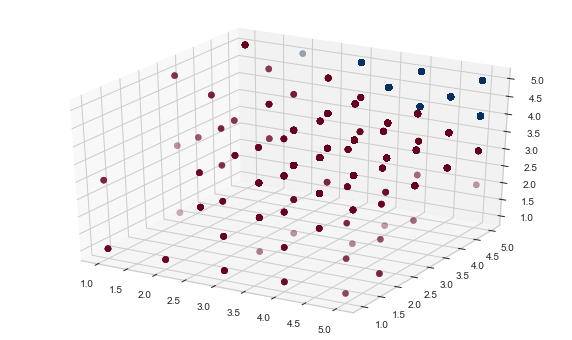

In [186]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

X = df_paper['Q15_1_OverallSat']
Y = df_paper['Q16_Revisit']
Z = df_paper['Q17_recommend']

ax.scatter(X, Y, Z,c=df_paper["cluster2"], s=40, cmap="RdBu")

# ax.view_init(30, 185)




In [187]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])
    sse.append(km.inertia_)

In [188]:
sse

[17799.463068416273,
 9255.621972550358,
 6592.639865205102,
 5416.133298499439,
 4490.443773747756,
 3781.220424124404,
 3182.2289922814934,
 2834.825582652046,
 2581.662680716516]

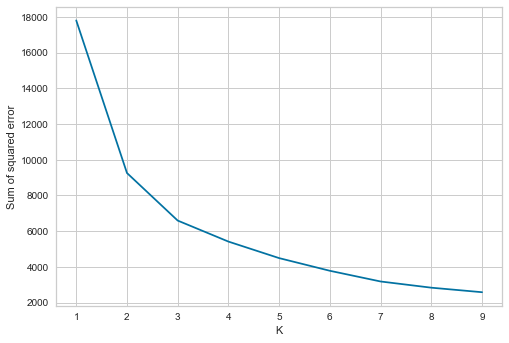

In [189]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

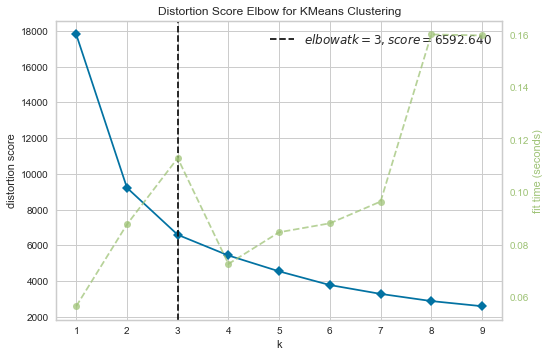

In [190]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Cluster 3

In [191]:
kmeans = KMeans(n_clusters=3, random_state=3)
km = kmeans.fit(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [192]:
km_predict = km.fit_predict(df_paper[['Q15_1_OverallSat', 'Q16_Revisit','Q17_recommend']])
km_predict

array([2, 1, 1, ..., 0, 0, 0], dtype=int32)

In [193]:
df_paper['cluster3'] = km_predict

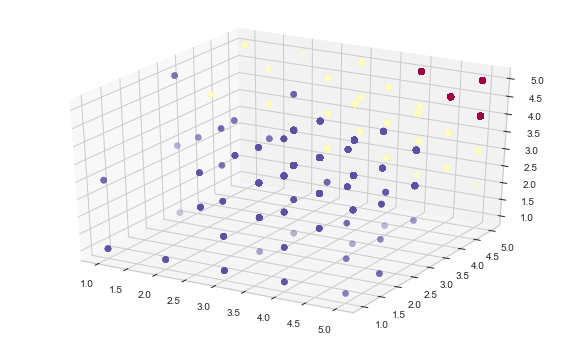

In [194]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

X = df_paper['Q15_1_OverallSat']
Y = df_paper['Q16_Revisit']
Z = df_paper['Q17_recommend']

ax.scatter(X, Y, Z,c=df_paper["cluster3"], s=40, cmap="Spectral")

# ax.view_init(30, 185)




In [195]:
df_paper['cluster2'].value_counts()

0    6491
1    5626
Name: cluster2, dtype: int64

In [196]:
df_paper['cluster3'].value_counts()

1    5569
0    4904
2    1644
Name: cluster3, dtype: int64

## valid sample

### length of stays less than 60 (Q10-2/3)
### purpose is leisure only (Q5.1)

In [197]:
df_paper.to_csv('1st paper data.csv')